In [55]:
#To address our analysis, we need to respond to the subsequent inquiries:#

##Q1. Do a greater number of restaurants provide online delivery as opposed to offline services?##
##Q2. Which types of restaurants are the most favored by the general public?##
##Q3. What price range is preferred by couples for their dinner at restaurants?##

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df =pd.read_csv("Zomato data .csv")

In [41]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [45]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
 
df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Text(0.5, 0, 'Type of Resturant')

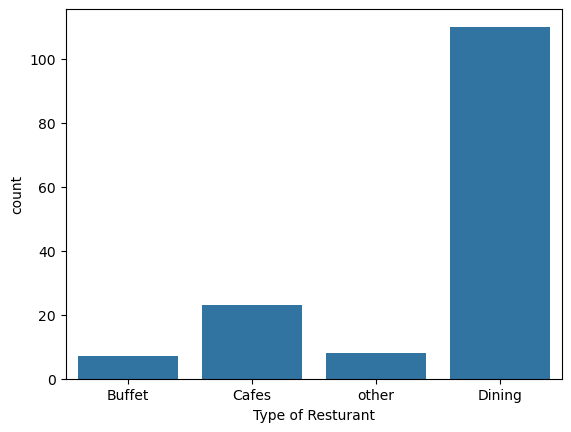

In [47]:
sns.countplot( x= df['listed_in(type)'])
plt.xlabel("Type of Resturant")

In [130]:
##The majority of the restaurants fall into the dining category.##

Text(0, 0.5, 'Votes')

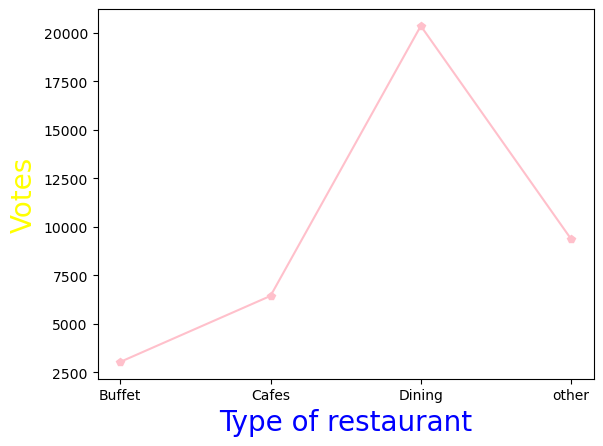

In [132]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="Pink", marker="p")
plt.xlabel("Type of restaurant", c="Blue", size=20)
plt.ylabel("Votes", c="Yellow", size=20)

In [85]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']
 
print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


In [136]:
#Dining restaurants are preferred by a larger number of individuals.#

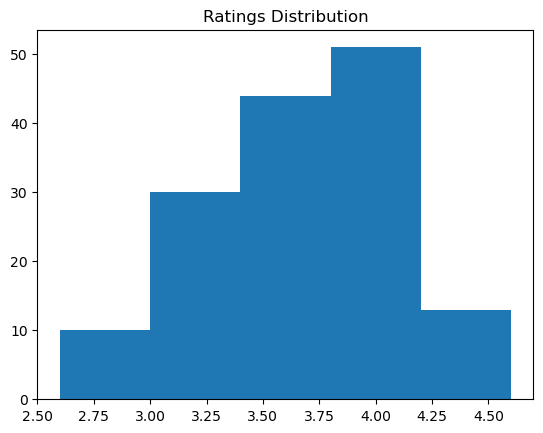

In [89]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

In [138]:
#Dining restaurants are preferred by a larger number of individuals.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

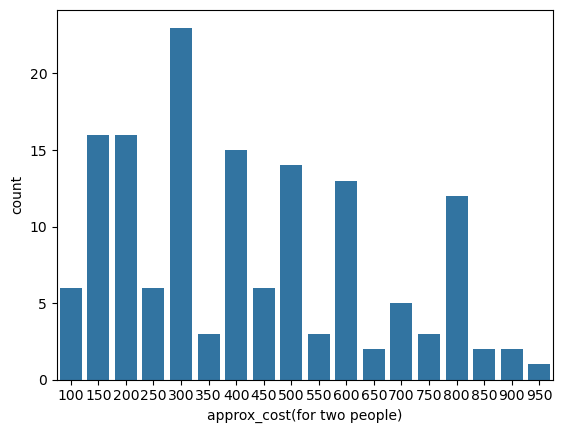

In [91]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [140]:
 #The majority of couples prefer restaurants with an approximate cost of 300 rupees.#

<Axes: xlabel='online_order', ylabel='rate'>

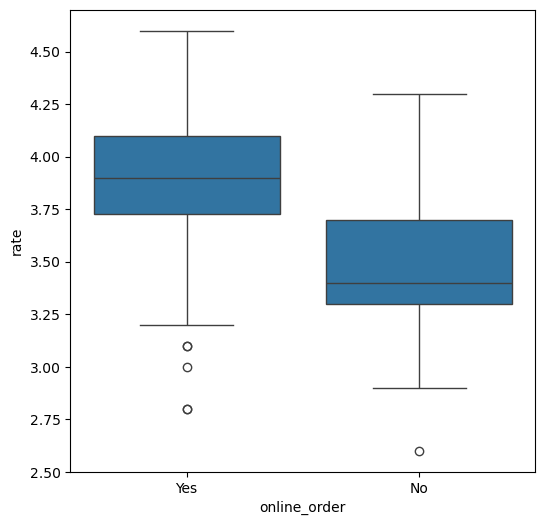

In [94]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

In [142]:
#Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.#

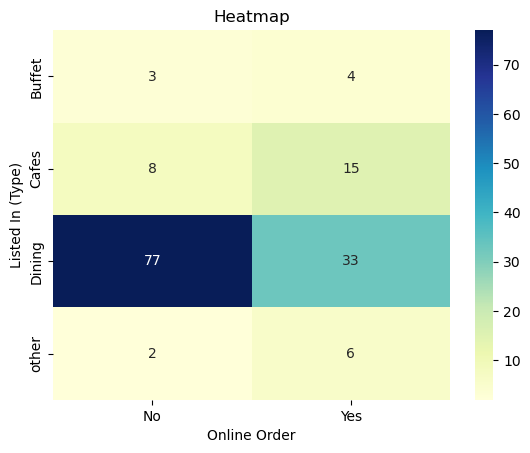

In [96]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

In [144]:
#Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.#